In [1]:
import numpy as np
import math
from sklearn import datasets
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

__1. Постройте график зависимости весов всех признаков от lambda в самописной L2-регуляризации (на данных про ЕГЭ). Сделайте вывод__

In [2]:
X = np.array([[   1,    1,  500,    1],
              [   1,    1,  700,    1],
              [   1,    2,  750,    2],
              [   1,    5,  600,    1],
              [   1,    3, 1450,    2],
              [   1,    0,  800,    1],
              [   1,    5, 1500,    3],
              [   1,   10, 2000,    3],
              [   1,    1,  450,    1],
              [   1,    2, 1000,    2]])


In [3]:
y = [45, 55, 50, 55, 60, 35, 75, 80, 50, 60]

In [4]:
def standard_scale(X):
    mean = X.mean()
    std = X.std()
    return (X - mean) / std

In [5]:
X_st = X.copy().astype(np.float64)
X_st[:, 1] = standard_scale(X_st[:, 1])
X_st[:, 2] = standard_scale(X_st[:, 2])
X_st[:, 3] = standard_scale(X_st[:, 3])

X_st

array([[ 1.        , -0.70710678, -0.97958969, -0.89625816],
       [ 1.        , -0.70710678, -0.56713087, -0.89625816],
       [ 1.        , -0.35355339, -0.46401617,  0.38411064],
       [ 1.        ,  0.70710678, -0.77336028, -0.89625816],
       [ 1.        ,  0.        ,  0.97958969,  0.38411064],
       [ 1.        , -1.06066017, -0.36090146, -0.89625816],
       [ 1.        ,  0.70710678,  1.08270439,  1.66447944],
       [ 1.        ,  2.47487373,  2.11385144,  1.66447944],
       [ 1.        , -0.70710678, -1.08270439, -0.89625816],
       [ 1.        , -0.35355339,  0.05155735,  0.38411064]])

-4.163336342344337e-17 0.9999999999999999


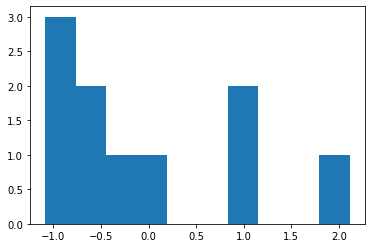

In [6]:
ind = 2
print(np.mean(X_st[:, ind]), np.std(X_st[:, ind]))
plt.hist(X_st[:, ind])
plt.show()

In [7]:
def calc_mse(y, y_pred):
    err = np.mean((y - y_pred)**2)
    return err

In [8]:
W = np.random.randn(X.shape[1])
W

array([ 0.04129928, -0.17713888, -0.20466579,  0.46916991])

In [9]:
def gradient_descent_reg_l2(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]

    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)

        dQ = 2 / n * X.T @ (y_pred - y)  # градиент функции ошибки
        dReg = reg * W# (np.sum(W ** 2, axis=0) ** 0.5)  # градиент регуляризации

        W -= eta * (dQ + dReg)

        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')

    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [10]:
gradient_descent_reg_l2(X_st, y, iterations=5000, eta=1e-1, reg=1e-4)

Iter: 0, weights: [11.66849982  3.24906031  0.75167582  3.21365031], error 3267.8403929397
Iter: 500, weights: [56.49717514  6.30232799 -0.35429153  6.56982603], error 24.904627710484775
Iter: 1000, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.90462764669089
Iter: 1500, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688834
Iter: 2000, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688827
Iter: 2500, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688827
Iter: 3000, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688827
Iter: 3500, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688827
Iter: 4000, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688827
Iter: 4500, weights: [56.49717514  6.30234588 -0.35437787  6.5698973 ], error 24.904627646688827
Final MSE: 24.904627646688827


array([56.49717514,  6.30234588, -0.35437787,  6.5698973 ])

Iter: 0, weights: [-0.81677828  0.42191769  0.51141699], error 2998.392248516999
Iter: 500, weights: [-4.42790809 -0.89990592  0.84789322], error 2966.9722784441033
Iter: 1000, weights: [-6.79629056 -1.47934516  2.01247769], error 2952.2153255831195
Iter: 1500, weights: [-8.53492246 -1.95439857  3.18605255], error 2942.898191687279
Iter: 2000, weights: [-9.85849636 -2.43025687  4.22963028], error 2936.7190279292563
Iter: 2500, weights: [-10.8788831   -2.91123065   5.13692499], error 2932.494998574668
Iter: 3000, weights: [-11.67052913  -3.38656142   5.92432821], error 2929.524768306692
Iter: 3500, weights: [-12.28778379  -3.84639367   6.60948693], error 2927.381233711076
Iter: 4000, weights: [-12.77146814  -4.28392858   7.20766951], error 2925.7987048920063
Iter: 4500, weights: [-13.15251071  -4.69505058   7.73158065], error 2924.607860600606
Final MSE: 2923.6978457366063
Iter: 0, weights: [-0.56615575 -1.16828789  1.59897157], error 2995.7682240455647
Iter: 500, weights: [-4.27051596 

Iter: 2000, weights: [-9.57514515 -2.03330557  3.7743097 ], error 2938.7056001995447
Iter: 2500, weights: [-10.6339844   -2.54386738   4.72293641], error 2934.0377591483416
Iter: 3000, weights: [-11.45362355  -3.04555058   5.54535222], error 2930.747214316143
Iter: 3500, weights: [-12.0914734   -3.52888917   6.25976121], error 2928.3662145945186
Iter: 4000, weights: [-12.59038884  -3.9871979    6.8823081 ], error 2926.603636597963
Iter: 4500, weights: [-12.98273938  -4.41649239   7.42649612], error 2925.2737076058556
Final MSE: 2924.254575518022
Iter: 0, weights: [-2.12733498  1.10933529  0.62890924], error 2990.007866573658
Iter: 500, weights: [-5.39912768 -0.35372337  0.91827549], error 2962.505606671998
Iter: 1000, weights: [-7.50882833 -1.04410452  2.04126048], error 2949.9032895040573
Iter: 1500, weights: [-9.04917496 -1.6040657   3.18032668], error 2941.788863296745
Iter: 2000, weights: [-10.22036784  -2.14383416   4.19564188], error 2936.273820094729
Iter: 2500, weights: [-11.12

Iter: 4000, weights: [-12.15962496  -3.97442438   6.66933606], error 2927.3376141755734
Iter: 4500, weights: [-12.53019119  -4.34518554   7.15582461], error 2926.032334612411
Final MSE: 2925.031679375946
Iter: 0, weights: [-0.36995312 -0.10399728  1.43542086], error 3002.4251631091183
Iter: 500, weights: [-4.18400464 -1.54697157  1.39451698], error 2966.4047610654357
Iter: 1000, weights: [-6.57368949 -2.0622661   2.41276816], error 2951.6420698689653
Iter: 1500, weights: [-8.27964188 -2.4433077   3.47540299], error 2942.626946856701
Iter: 2000, weights: [-9.55042957 -2.82203119  4.41104913], error 2936.7610099625063
Iter: 2500, weights: [-10.51062179  -3.20673803   5.21013362], error 2932.8067543767656
Iter: 3000, weights: [-11.24091855  -3.58712912   5.89029386], error 2930.0527876351043
Iter: 3500, weights: [-11.79906351  -3.9535336    6.47066294], error 2928.07611226889
Iter: 4000, weights: [-12.22766364  -4.29947371   6.96761714], error 2926.6189830737967
Iter: 4500, weights: [-12.

Iter: 1500, weights: [-7.43037566 -2.34543285  3.07778882], error 2946.5127712621033
Iter: 2000, weights: [-8.4036866  -2.57272641  3.74566479], error 2941.5585290036074
Iter: 2500, weights: [-9.08204709 -2.79493406  4.27109301], error 2938.3058036667
Iter: 3000, weights: [-9.55774919 -3.00356188  4.6831429 ], error 2936.0899079817564
Iter: 3500, weights: [-9.8928451  -3.19272903  5.00716992], error 2934.5340586140874
Iter: 4000, weights: [-10.12994009  -3.35995435   5.2629461 ], error 2933.414792466066
Iter: 4500, weights: [-10.29849268  -3.50508972   5.46559488], error 2932.593817664154
Final MSE: 2931.9821676693455
Iter: 0, weights: [-0.82433361  1.31049623 -0.73491369], error 3000.7402081352416
Iter: 500, weights: [-4.06511182 -0.02855199 -0.04516062], error 2972.3194521489613
Iter: 1000, weights: [-6.00024692 -0.68256205  1.10730932], error 2958.705440341466
Iter: 1500, weights: [-7.27779968 -1.18563968  2.10296071], error 2950.437755659048
Iter: 2000, weights: [-8.1489998  -1.621

Iter: 0, weights: [-0.32675991  0.83293158  0.1752691 ], error 3004.4810061249705
Iter: 500, weights: [-3.02614061 -0.59303043  0.30932628], error 2977.099380975936
Iter: 1000, weights: [-3.93187799 -0.95508888  0.80860777], error 2969.8293977067706
Iter: 1500, weights: [-4.28197213 -1.10847895  1.08433175], error 2967.006316846722
Iter: 2000, weights: [-4.42378367 -1.18549766  1.21609878], error 2965.8286176071556
Iter: 2500, weights: [-4.48215718 -1.22499672  1.27742807], error 2965.3236983234156
Iter: 3000, weights: [-4.50637292 -1.24506064  1.30588402], error 2965.1040675885747
Iter: 3500, weights: [-4.51647817 -1.2551267   1.31911139], error 2965.007576973876
Iter: 4000, weights: [-4.52071945 -1.26012409  1.32527644], error 2964.9648377834214
Iter: 4500, weights: [-4.52251035 -1.26258446  1.3281573 ], error 2964.945768136234
Final MSE: 2964.9372019411594
Iter: 0, weights: [-2.25072249 -0.47116351  0.16749133], error 2983.01682643803
Iter: 500, weights: [-3.40204642 -0.88677522  0.

Iter: 4500, weights: [-1.20873104 -0.41122203  0.0588316 ], error 2991.3874066826147
Final MSE: 2991.3874066826147
Iter: 0, weights: [-0.39490034 -0.38210891 -0.14115528], error 2998.582687194909
Iter: 500, weights: [-1.01615891 -0.35696359  0.02701764], error 2993.1710381249227
Iter: 1000, weights: [-1.02319582 -0.35648114  0.02987197], error 2993.1115444821417
Iter: 1500, weights: [-1.0232783  -0.35647811  0.02991113], error 2993.110838200514
Iter: 2000, weights: [-1.02327927 -0.35647813  0.02991165], error 2993.110829661262
Iter: 2500, weights: [-1.02327928 -0.35647813  0.02991166], error 2993.1108295571385
Iter: 3000, weights: [-1.02327928 -0.35647813  0.02991166], error 2993.11082955586
Iter: 3500, weights: [-1.02327928 -0.35647813  0.02991166], error 2993.1108295558447
Iter: 4000, weights: [-1.02327928 -0.35647813  0.02991166], error 2993.1108295558447
Iter: 4500, weights: [-1.02327928 -0.35647813  0.02991166], error 2993.1108295558447
Final MSE: 2993.1108295558447
Iter: 0, weigh

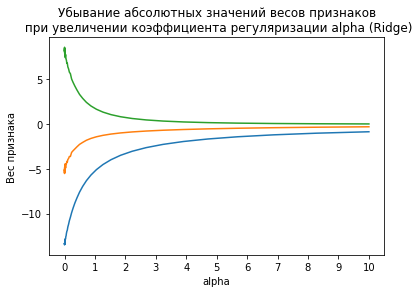

In [11]:
n = 50

train_amount = 7
train_X = X_st[:train_amount, 1:4]
train_y = y[:train_amount]
test_X = X_st[train_amount:,1:4]
test_y = y[train_amount:]

coeffs = np.zeros((n, train_X.shape[1]))
alpha_list = np.logspace(-3, 1, n)

for i, val in enumerate(alpha_list):
    coeffs[i, :] = gradient_descent_reg_l2(train_X, train_y, iterations=5000, eta=1e-3, reg=val)
for i in range(train_X.shape[1]):
    plt.plot(alpha_list, coeffs[:, i])

plt.title('Убывание абсолютных значений весов признаков\n при увеличении коэффициента регуляризации alpha (Ridge)')
plt.xticks(np.arange(0, 11, 1))
plt.xlabel('alpha')
plt.ylabel('Вес признака');

__2. Напишите функцию наподобие gradient_descent_reg_l2, но для применения L1-регуляризации.__

In [12]:
def gradient_descent_reg_l1(X, y, iterations, eta=1e-4, reg=1e-8):
    W = np.random.randn(X.shape[1])
    n = X.shape[0]

    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)

        dQ = 2 / n * X.T @ (y_pred - y)  # градиент функции ошибки

        dReg = reg * np.sum(np.abs(W), axis=0)  # градиент регуляризации

        W -= eta * (dQ + dReg)

        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, weights: {W}, error {err}')

    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W

In [13]:
gradient_descent_reg_l1(X_st, y, iterations=5000, eta=1e-1, reg=1e-2)

Iter: 0, weights: [10.54556341  1.35635329  2.2458515   2.04408177], error 3494.7903375950873
Iter: 500, weights: [56.1544899   6.1200526  -0.41592422  6.41158459], error 25.163054505161764
Iter: 1000, weights: [56.15448836  6.12008021 -0.41606184  6.41169738], error 25.16305362042747
Iter: 1500, weights: [56.15448836  6.12008021 -0.41606185  6.41169739], error 25.16305362039879
Iter: 2000, weights: [56.15448836  6.12008021 -0.41606185  6.41169739], error 25.163053620398777
Iter: 2500, weights: [56.15448836  6.12008021 -0.41606185  6.41169739], error 25.163053620398777
Iter: 3000, weights: [56.15448836  6.12008021 -0.41606185  6.41169739], error 25.163053620398777
Iter: 3500, weights: [56.15448836  6.12008021 -0.41606185  6.41169739], error 25.163053620398777
Iter: 4000, weights: [56.15448836  6.12008021 -0.41606185  6.41169739], error 25.163053620398777
Iter: 4500, weights: [56.15448836  6.12008021 -0.41606185  6.41169739], error 25.163053620398777
Final MSE: 25.163053620398777


array([56.15448836,  6.12008021, -0.41606185,  6.41169739])

__2. Можно ли к одному и тому же признаку применить сразу и нормализацию, и стандартизацию?__

In [14]:
def standard_scale(X):
    mean = X.mean(axis=0)
    std = X.std(axis=0)
    return (X - mean) / std

In [15]:
def min_max_scale(X):
    return (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

In [16]:
X_norm = X.copy().astype('float64')
X_norm = min_max_scale(X_norm[:, 1:])
X_norm.min(axis=0), X_norm.max(axis=0)

(array([0., 0., 0.]), array([1., 1., 1.]))

In [17]:
X_norm.mean(axis=0), X_norm.std(axis=0)

(array([0.3       , 0.33870968, 0.35      ]),
 array([0.28284271, 0.31283671, 0.39051248]))

In [18]:
X_norm_st = standard_scale(X_norm)
X_norm_st.min(axis=0), X_norm_st.max(axis=0)

(array([-1.06066017, -1.08270439, -0.89625816]),
 array([2.47487373, 2.11385144, 1.66447944]))

In [19]:
X_norm_st.mean(axis=0), X_norm_st.std(axis=0)

(array([-1.49880108e-16, -6.86950496e-17,  8.32667268e-17]),
 array([1., 1., 1.]))

__3. *Сгенерируйте датасет при помощи sklearn.datasets.make_regression и обучите линейную модель при помощи градиентного и стохастического градиентного спуска. Нанесите среднеквадратичную ошибку для обоих методов на один график, сделайте выводы о разнице скорости сходимости каждого из методов.__

In [20]:
from sklearn import datasets

X, Y, coef = datasets.make_regression(n_samples=100000, n_features=20, n_informative=10, n_targets=1, 
                                      noise=5, coef=True, random_state=2)
display(X, Y, coef)

array([[-0.71760732, -1.09367119, -0.73597009, ..., -0.09194752,
         0.77271648, -0.5294093 ],
       [-0.21856062, -0.43937009,  1.17601766, ..., -0.44205731,
         0.65967443, -0.5364636 ],
       [-0.09232329, -0.04777714,  0.58128624, ..., -0.64041891,
         1.29076796, -0.34530826],
       ...,
       [-0.1724219 ,  1.20477844,  0.77081956, ...,  1.78646758,
        -0.59041036, -0.6747931 ],
       [ 0.93830193, -0.05266006,  1.45767292, ..., -1.01765261,
         0.02393901,  1.37086726],
       [-0.99582701,  1.30720547, -0.04855569, ...,  1.85683052,
        -0.26133944,  0.50888458]])

array([-133.10543687,   44.01778172,   48.98233093, ..., -271.14963388,
        161.66813826,  380.05918834])

array([8.03590530e+00, 9.63394753e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 7.86058430e+01, 0.00000000e+00, 0.00000000e+00,
       9.61298231e+01, 5.95379955e+01, 0.00000000e+00, 3.30583257e+01,
       3.71965212e+01, 6.59198012e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.78539772e+01, 0.00000000e+00, 7.36381949e+01])

In [21]:
X = standard_scale(X)

In [22]:
np.random.seed(4)
init_W = np.random.randn(X.shape[1])
init_W

array([ 0.05056171,  0.49995133, -0.99590893,  0.69359851, -0.41830152,
       -1.58457724, -0.64770677,  0.59857517,  0.33225003, -1.14747663,
        0.61866969, -0.08798693,  0.4250724 ,  0.33225315, -1.15681626,
        0.35099715, -0.60688728,  1.54697933,  0.72334161,  0.04613557])

In [23]:
# стохастический градиентный спуск

def stohastic_gradient_descent(W, X, Y, iterations, eta=1e-4, size=1):
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        
        train_ind = np.random.randint(X.shape[0], size=size)

        y_pred = np.dot(X[train_ind], W)
        W = W - eta * 2 / Y[train_ind].shape[0] * np.dot(X[train_ind].T, y_pred - Y[train_ind])

        error = calc_mse(Y, np.dot(X, W))
        errors.append(error)
        w_list.append(W)
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {error}')
    
    print(f'Final MSE: {calc_mse(Y, np.dot(X, W))}')
    return W, errors, w_list

In [24]:
# классический  GD
def gradient_descent(W, X, y, iterations, eta=1e-4):
    n = X.shape[0]
    
    errors = []
    w_list = [W.copy()]
    for i in range(0, iterations):
        y_pred = np.dot(X, W)
        err = calc_mse(y, y_pred)
        errors.append(err)
        
        dQ = 2/n * X.T @ (y_pred - y) # градиент функции ошибки
        W -= (eta * dQ)
        w_list.append(W.copy())
        
        if i % (iterations / 10) == 0:
            print(f'Iter: {i}, error {err}')
        
    print(f'Final MSE: {calc_mse(y, np.dot(X, W))}')
    return W, errors, w_list

In [25]:
%%time
weights_GD, errors_GD, w_list_GD = gradient_descent(init_W, X, Y, iterations=5000, eta=1e-3)

Iter: 0, error 28238.145558270597
Iter: 500, error 3773.857140475058
Iter: 1000, error 523.5463031642968
Iter: 1500, error 91.40234234740227
Iter: 2000, error 33.905382777624474
Iter: 2500, error 26.24984618250239
Iter: 3000, error 25.229794983175754
Iter: 3500, error 25.0937805690566
Iter: 4000, error 25.075631039130027
Iter: 4500, error 25.073207422322483
Final MSE: 25.07288354458468
Wall time: 39.3 s


In [26]:
np.random.seed(9)
init_W = np.random.randn(X.shape[1])
init_W

array([ 1.10855471e-03, -2.89544069e-01, -1.11606630e+00, -1.28827567e-02,
       -3.78361464e-01, -4.81135363e-01, -1.51733118e+00, -4.90871981e-01,
       -2.40680579e-01, -6.47947460e-01,  6.35891080e-01,  1.74011731e+00,
        2.96682218e-01,  7.07503662e-01,  1.82281576e+00,  4.30769029e-01,
        1.54272963e+00, -9.00721171e-01, -1.37125010e-01,  1.29757901e+00])

In [27]:
%%time
weights_SGD, errors_SGD, w_list_SGD = stohastic_gradient_descent(init_W, X, Y, iterations=5000, eta=1e-3, size=1)

Iter: 0, error 27940.77081989326
Iter: 500, error 3909.816186117472
Iter: 1000, error 706.2521418796898
Iter: 1500, error 120.35629563367924
Iter: 2000, error 39.60425259602933
Iter: 2500, error 28.22301680954602
Iter: 3000, error 25.817348849230516
Iter: 3500, error 25.704226689560503
Iter: 4000, error 25.595371308044225
Iter: 4500, error 25.525400398020874
Final MSE: 25.42803342673532
Wall time: 7.22 s


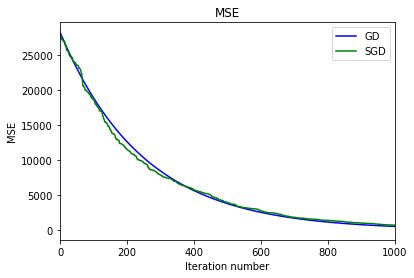

In [28]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors_GD)), errors_GD, color='b', label='GD')
plt.plot(range(len(errors_SGD)), errors_SGD, color='g', label='SGD')

plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')
plt.xlim(0, 1000)
plt.legend();

In [29]:
w_list_GD = np.array(w_list_GD)
w_list_SGD = np.array(w_list_SGD)

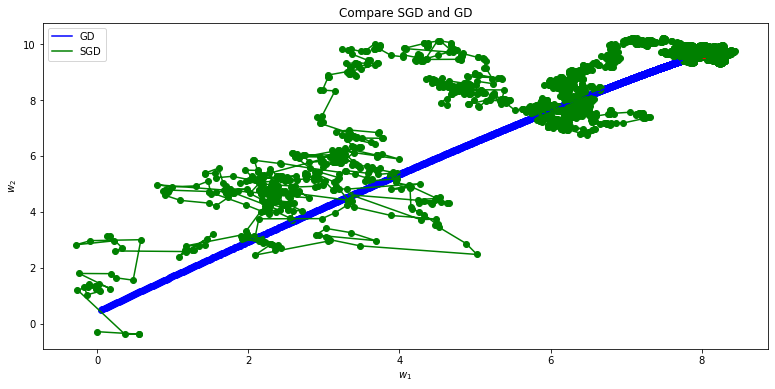

In [30]:
# Визуализируем изменение весов (красной точкой обозначены истинные веса, сгенерированные вначале)
plt.figure(figsize=(13, 6))
plt.title('Compare SGD and GD')
plt.xlabel(r'$w_1$')
plt.ylabel(r'$w_2$')

plt.scatter(w_list_GD[:, 0], w_list_GD[:, 1], color='b')
plt.plot(w_list_GD[:, 0], w_list_GD[:, 1], color='b', label='GD')

plt.scatter(w_list_SGD[:, 0], w_list_SGD[:, 1], color='g')
plt.plot(w_list_SGD[:, 0], w_list_SGD[:, 1], color='g', label='SGD')
plt.scatter(coef[0], coef[1], c='r')

plt.legend()
plt.show()